In [1]:
import pandas as pd
import seaborn as sns

# Load Titanic dataset
df = sns.load_dataset('titanic')  

# Preview the dataset
print(df.head())
print(df.info())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [2]:
#handle missing values
df = df.drop(columns=['deck', 'embark_town', 'alive'])
df['age'] = df['age'].fillna(df['age'].median())
df = df.dropna()


In [2]:
from sklearn.preprocessing import LabelEncoder

# Encode 'sex' and 'embarked'
label = LabelEncoder()
df['sex'] = label.fit_transform(df['sex'])        
df['embarked'] = label.fit_transform(df['embarked'])  


In [4]:
from sklearn.preprocessing import StandardScaler

features = ['age', 'fare', 'pclass']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


In [5]:
from sklearn.model_selection import train_test_split

X = df[['age', 'fare', 'pclass', 'sex', 'embarked']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 0.14635637881483282
R²: 0.3834389700346812


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Accuracy: 0.7752808988764045
Precision: 0.6933333333333334
Recall: 0.7536231884057971


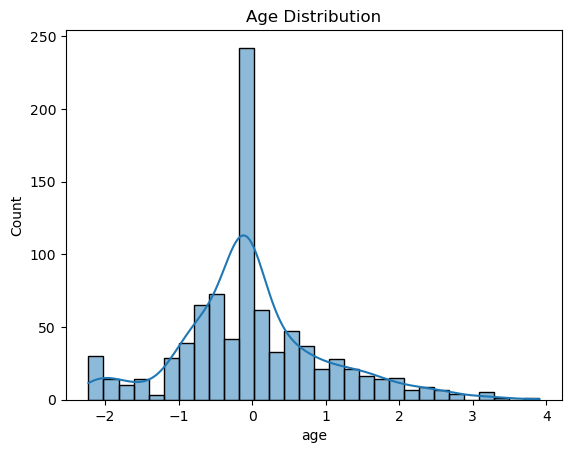

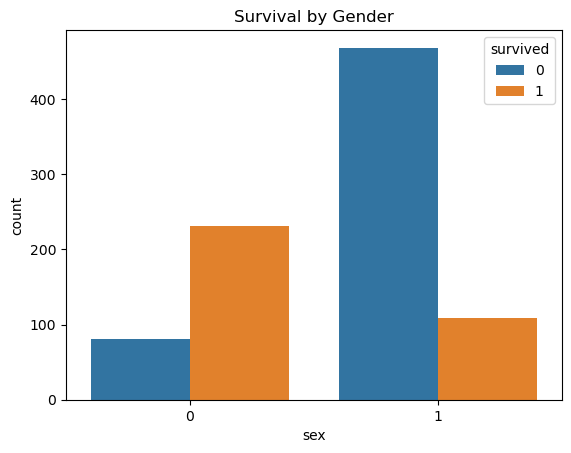

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival by Gender')
plt.show()


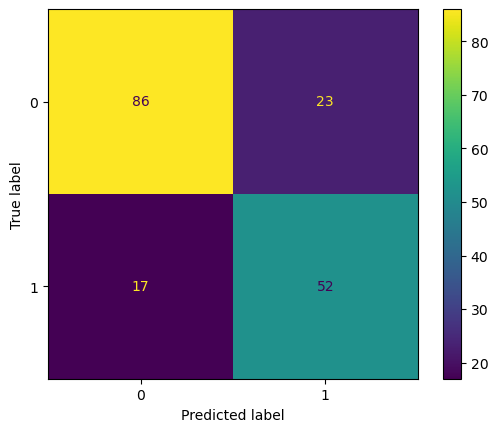

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
